In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/MELD/train_sent_emo.csv')

In [3]:
df_test = pd.read_csv('dataset/MELD/test_sent_emo.csv')
df_dev = pd.read_csv('dataset/MELD/dev_sent_emo.csv')

In [4]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        2610 non-null   int64 
 1   Utterance     2610 non-null   object
 2   Speaker       2610 non-null   object
 3   Emotion       2610 non-null   object
 4   Sentiment     2610 non-null   object
 5   Dialogue_ID   2610 non-null   int64 
 6   Utterance_ID  2610 non-null   int64 
 7   Season        2610 non-null   int64 
 8   Episode       2610 non-null   int64 
 9   StartTime     2610 non-null   object
 10  EndTime       2610 non-null   object
dtypes: int64(5), object(6)
memory usage: 224.4+ KB


In [7]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        1109 non-null   int64 
 1   Utterance     1109 non-null   object
 2   Speaker       1109 non-null   object
 3   Emotion       1109 non-null   object
 4   Sentiment     1109 non-null   object
 5   Dialogue_ID   1109 non-null   int64 
 6   Utterance_ID  1109 non-null   int64 
 7   Season        1109 non-null   int64 
 8   Episode       1109 non-null   int64 
 9   StartTime     1109 non-null   object
 10  EndTime       1109 non-null   object
dtypes: int64(5), object(6)
memory usage: 95.4+ KB


# Dataset Analytics

## How many classes do we have?

In [8]:
classes = df['Emotion'].unique()
print(f"Number of classes in training set: {len(classes)}\nClasses: {classes}")
classes_test = df_test['Emotion'].unique()
print(f"Number of classes in test set: {len(classes_test)}\nClasses: {classes_test}")
classes_dev = df_dev['Emotion'].unique()
print(f"Number of classes in test set: {len(classes_dev)}\nClasses: {classes_dev}")

Number of classes in training set: 7
Classes: ['neutral' 'surprise' 'fear' 'sadness' 'joy' 'disgust' 'anger']
Number of classes in test set: 7
Classes: ['surprise' 'anger' 'neutral' 'joy' 'sadness' 'fear' 'disgust']
Number of classes in test set: 7
Classes: ['sadness' 'surprise' 'neutral' 'joy' 'anger' 'disgust' 'fear']


## What is the categories distribution? Is the dataset balanced?

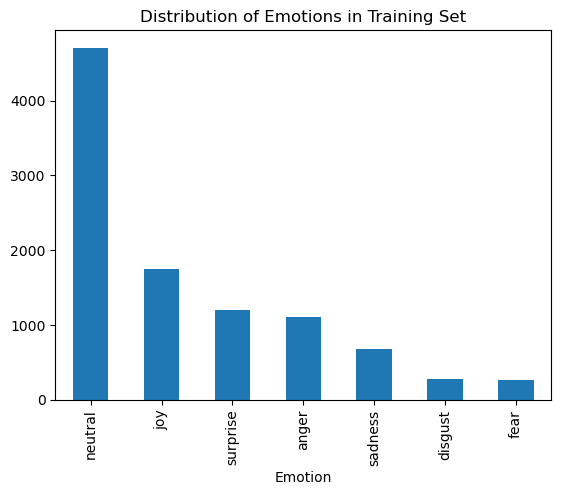

In [9]:
class_counts = df['Emotion'].value_counts()
class_counts.plot(kind='bar', title='Emotion Class Distribution')
plt.title('Distribution of Emotions in Training Set')
plt.show()

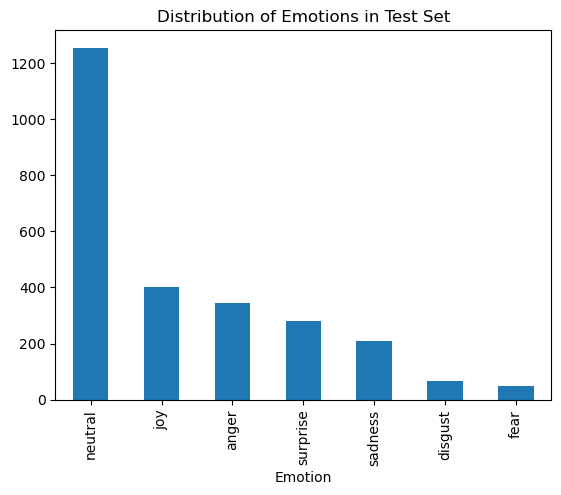

In [10]:
class_counts_test = df_test['Emotion'].value_counts()
class_counts_test.plot(kind='bar', title='Emotion Class Distribution')
plt.title('Distribution of Emotions in Test Set')
plt.show()

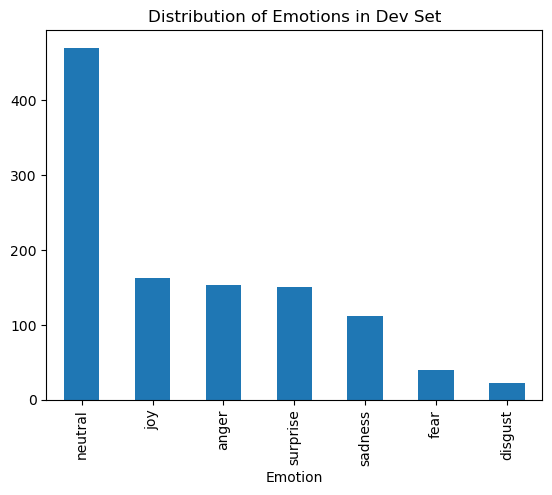

In [11]:
class_counts_dev = df_dev['Emotion'].value_counts()
class_counts_dev.plot(kind='bar', title='Emotion Class Distribution')
plt.title('Distribution of Emotions in Dev Set')
plt.show()

## How many entries do we have?

In [12]:
print(f"Total entries: {len(df)}")
print(f"Total entries: {len(df_test)}")
print(f"Total entries: {len(df_dev)}")

Total entries: 9989
Total entries: 2610
Total entries: 1109


## What is our vocabulary?

In [13]:
from collections import Counter
import nltk
nltk.download('punkt')

all_words = nltk.word_tokenize(" ".join(df['Utterance']))
vocabulary = set(all_words)
print(f"Vocabulary size: {len(vocabulary)}")

ModuleNotFoundError: No module named 'nltk'

## What is the length of the sentences?

In [14]:
df.columns

Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'],
      dtype='object')

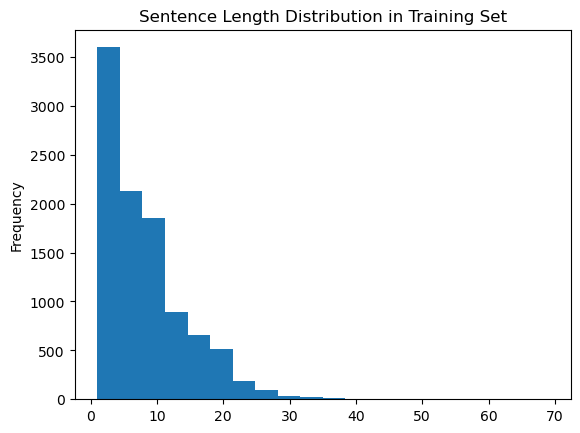

In [15]:
df['sentence_length'] = df['Utterance'].apply(lambda x: len(x.split()))
# print(df['sentence_length'].describe())

df['sentence_length'].plot(kind='hist', bins=20, title='Sentence Length Distribution in Training Set')
plt.show()

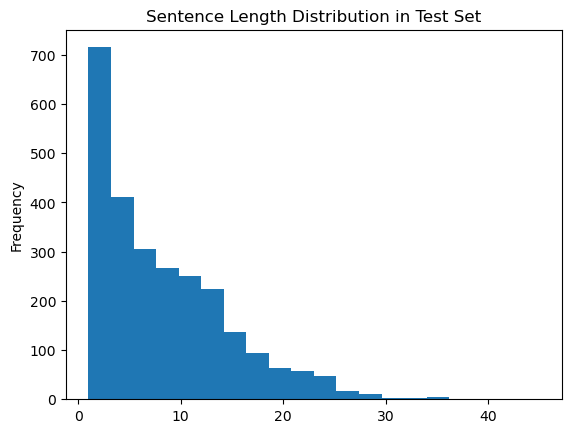

In [16]:
df_test['sentence_length'] = df_test['Utterance'].apply(lambda x: len(x.split()))
# print(df_test['sentence_length'].describe())

df_test['sentence_length'].plot(kind='hist', bins=20, title='Sentence Length Distribution in Test Set')
plt.show()

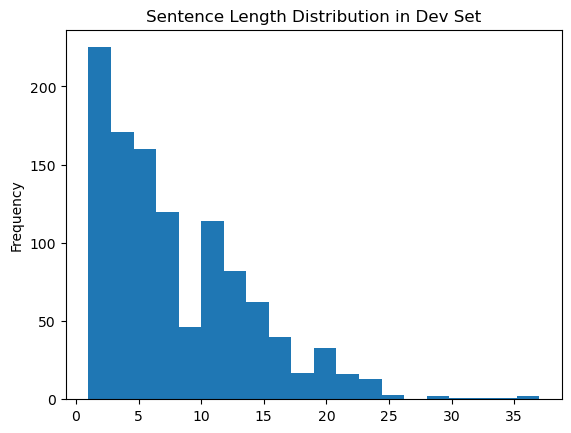

In [17]:
df_dev['sentence_length'] = df_dev['Utterance'].apply(lambda x: len(x.split()))
# print(df_test['sentence_length'].describe())

df_dev['sentence_length'].plot(kind='hist', bins=20, title='Sentence Length Distribution in Dev Set')
plt.show()

## What is the dataset word distribution (word usage frequency)?

In [18]:
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
print(f"Most common words: {most_common_words}")

NameError: name 'all_words' is not defined

## Can we use TF-IDF for analytics?

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['Utterance'])
print(f"TF-IDF shape: {tfidf_matrix.shape}")

TF-IDF shape: (9989, 1000)


In [20]:
tfidf_matrix

<9989x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 62761 stored elements in Compressed Sparse Row format>

In [21]:
# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()

# Convert the TF-IDF matrix to a dense matrix for easier manipulation
dense_matrix = tfidf_matrix.todense()

# Create a DataFrame to represent the TF-IDF scores
tfidf_df = pd.DataFrame(dense_matrix, columns=feature_names)
emotions = df['Emotion'].tolist()
# Add the emotion labels to the DataFrame
tfidf_df["Emotion"] = emotions

In [24]:
# Aggregate TF-IDF scores for each word grouped by emotion
tfidf_by_emotion = tfidf_df.groupby("Emotion").sum()

# Example: Top words for each emotion
for emotion in tfidf_by_emotion.index:
    top_words = tfidf_by_emotion.loc[emotion].sort_values(ascending=False).head(10)
    print(f"Top words for {emotion}:")
    print(top_words)
    print()


Top words for anger:
you     76.542050
no      54.138671
it      50.371762
the     44.826766
that    41.640528
to      37.973964
me      33.539688
and     32.675125
not     31.200132
my      29.350476
Name: anger, dtype: float64

Top words for disgust:
you     18.805514
that    14.227734
no      13.804439
the     11.987444
oh      11.203892
it      10.241405
and      9.348675
to       8.920307
re       7.985350
with     7.051016
Name: disgust, dtype: float64

Top words for fear:
no      20.397309
you     14.629120
oh      14.350397
don     12.983325
uh      10.012632
to       9.949607
it       9.205819
what     8.856733
do       8.680881
know     7.805213
Name: fear, dtype: float64

Top words for joy:
you      98.467890
hey      84.221084
it       73.185012
oh       70.645413
that     60.177548
the      52.044048
great    50.840805
yeah     49.921418
and      47.075177
to       46.483727
Name: joy, dtype: float64

Top words for neutral:
you     259.989751
yeah    185.515003
okay    185

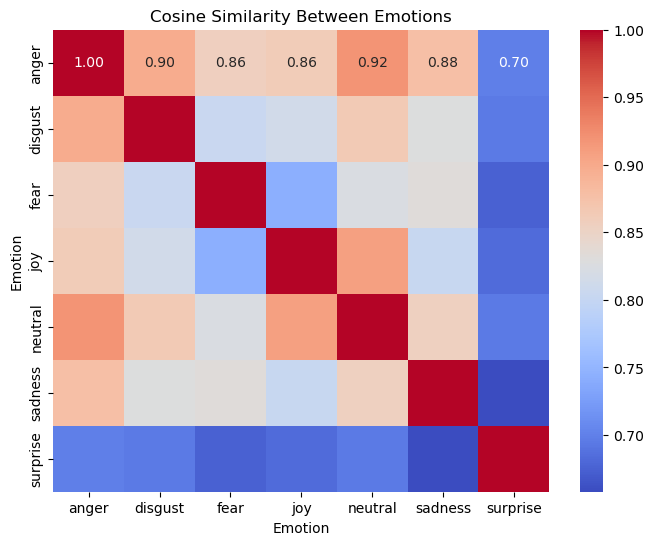

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between emotions
cosine_sim = cosine_similarity(tfidf_by_emotion)

# Create a DataFrame for the similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=tfidf_by_emotion.index, columns=tfidf_by_emotion.index)

# Display the similarity matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cosine Similarity Between Emotions")
plt.show()


In [26]:
cosine_sim_df

Emotion,anger,disgust,fear,joy,neutral,sadness,surprise
Emotion,,,,,,,
anger,1.000000,0.897956,0.856500,0.861322,0.918903,0.877237,0.699066
disgust,0.897956,1.000000,0.804160,0.814140,0.864969,0.827752,0.695218
fear,0.856500,0.804160,1.000000,0.743251,0.823697,0.832933,0.674050
joy,0.861322,0.814140,0.743251,1.000000,0.909127,0.803069,0.683087
neutral,0.918903,0.864969,0.823697,0.909127,1.000000,0.854442,0.694404
sadness,0.877237,0.827752,0.832933,0.803069,0.854442,1.000000,0.657970
surprise,0.699066,0.695218,0.674050,0.683087,0.694404,0.657970,1.000000


In [27]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5, random_state=42)
topics = nmf_model.fit_transform(tfidf_matrix)
topics

array([[0.03495688, 0.        , 0.        , 0.00045984, 0.        ],
       [0.02214611, 0.        , 0.        , 0.        , 0.        ],
       [0.03209847, 0.00085974, 0.00042582, 0.00284253, 0.00073035],
       ...,
       [0.06004118, 0.00601666, 0.        , 0.        , 0.00402033],
       [0.        , 0.        , 0.        , 0.1961885 , 0.        ],
       [0.03434331, 0.        , 0.00148111, 0.        , 0.00178789]])

In [28]:
from collections import Counter
transitions = [(emotions[i], emotions[i+1]) for i in range(len(emotions)-1)]
transition_counts = Counter(transitions)
transition_counts

Counter({('neutral', 'neutral'): 2589,
         ('neutral', 'joy'): 718,
         ('joy', 'neutral'): 692,
         ('joy', 'joy'): 565,
         ('surprise', 'neutral'): 559,
         ('neutral', 'surprise'): 555,
         ('anger', 'neutral'): 406,
         ('neutral', 'anger'): 390,
         ('anger', 'anger'): 328,
         ('sadness', 'neutral'): 247,
         ('neutral', 'sadness'): 245,
         ('joy', 'surprise'): 192,
         ('surprise', 'joy'): 192,
         ('surprise', 'surprise'): 189,
         ('sadness', 'sadness'): 155,
         ('anger', 'joy'): 132,
         ('joy', 'anger'): 130,
         ('surprise', 'anger'): 122,
         ('fear', 'neutral'): 114,
         ('anger', 'surprise'): 108,
         ('neutral', 'fear'): 107,
         ('neutral', 'disgust'): 106,
         ('disgust', 'neutral'): 102,
         ('sadness', 'surprise'): 95,
         ('surprise', 'sadness'): 81,
         ('joy', 'sadness'): 81,
         ('sadness', 'joy'): 77,
         ('anger', 'sadness')

In [29]:
df.columns

Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime',
       'sentence_length'],
      dtype='object')

In [30]:
from wordcloud import WordCloud
for emotion in tfidf_by_emotion.index:
    # Convert the scores for this emotion into a dictionary
    word_scores = tfidf_by_emotion.loc[emotion].to_dict()
    
    # Generate a word cloud
    wordcloud = WordCloud(background_color="white", colormap="viridis").generate_from_frequencies(word_scores)
    
    # Display the word cloud
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {emotion.capitalize()}")
    plt.axis("off")
    plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [31]:
from wordcloud import WordCloud

# Generate word clouds for each emotion
for emotion in df['Emotion'].unique():
    text = " ".join(df[df['Emotion'] == emotion]['Sentence'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {emotion}")
    plt.show()

ModuleNotFoundError: No module named 'wordcloud'

## Emotion distribution among actors?

In [32]:
df['Speaker'].unique()
main_characters = ['Chandler', 'Joey', 'Rachel', 'Monica','Phoebe', 'Ross']

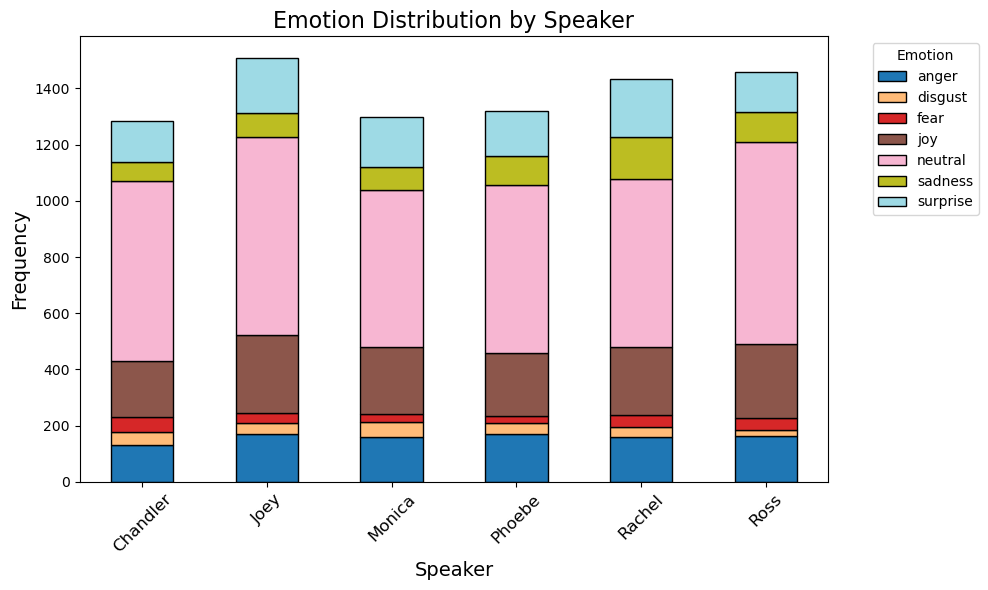

In [33]:
actor_emotion_distribution = df.groupby(['Speaker', 'Emotion']).size().unstack(fill_value=0).reset_index()
actor_emotion_distribution = actor_emotion_distribution[actor_emotion_distribution['Speaker'].isin (main_characters) ]

# Set the Speaker as the index
actor_emotion_distribution.set_index("Speaker", inplace=True)

# Plot a stacked bar chart
ax = actor_emotion_distribution.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20", edgecolor="black")

# Customize the plot
plt.title("Emotion Distribution by Speaker", fontsize=16)
plt.xlabel("Speaker", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
# actor_emotion_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), title='Emotion Distribution by Actor')
# plt.show()

## Sentences distribution by actors?

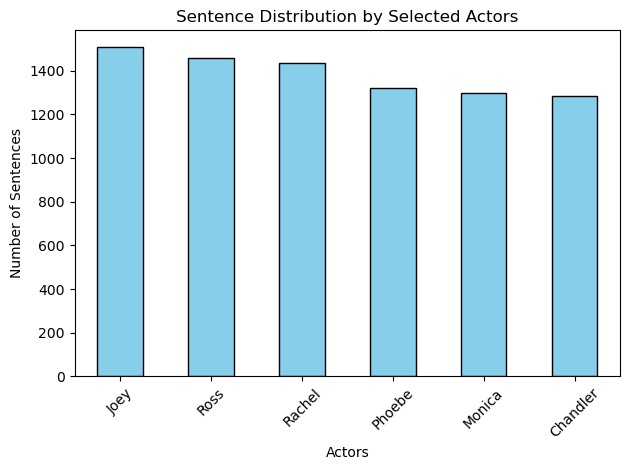

In [34]:

filtered_df = df[df['Speaker'].isin(main_characters )]

# Calculate the value counts for the filtered actors
actor_distribution = filtered_df['Speaker'].value_counts()

# Plot the distribution
actor_distribution.plot(kind='bar', title='Sentence Distribution by Selected Actors', color='skyblue', edgecolor='black')
plt.xlabel("Actors")
plt.ylabel("Number of Sentences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Descriptive Statistics by Emotion

In [35]:
emotion_sentence_stats = df.groupby('Emotion')['sentence_length'].describe()

# Display table
print(emotion_sentence_stats)

           count      mean       std  min  25%  50%   75%   max
Emotion                                                        
anger     1109.0  9.147881  6.349888  1.0  4.0  8.0  13.0  36.0
disgust    271.0  9.948339  7.075591  1.0  4.0  8.0  15.0  41.0
fear       268.0  9.063433  6.210394  1.0  4.0  8.0  13.0  31.0
joy       1743.0  7.733219  6.039145  1.0  3.0  6.0  11.0  40.0
neutral   4710.0  7.777282  6.192621  1.0  3.0  6.0  11.0  48.0
sadness    683.0  9.938507  7.080747  1.0  5.0  8.0  13.0  69.0
surprise  1205.0  6.000830  5.020142  1.0  2.0  5.0   8.0  31.0


## Contextual Word Analysis

Objective: Identify key phrases or co-occurring words that are specific to each emotion.
Approach:
Extract bigrams and trigrams from sentences associated with each emotion.
Analyze the most frequent word combinations for a given emotion.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract bigrams for each emotion
for emotion in df['Emotion'].unique():
    text = " ".join(df[df['Emotion'] == emotion]['Utterance'])
    vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=10)
    ngrams = vectorizer.fit_transform([text])
    print(f"Top Phrases for {emotion}:")
    print(vectorizer.get_feature_names_out())


Top Phrases for neutral:
['all right' 'do you' 'have to' 'in the' 'know what' 'no no' 'this is'
 'we re' 'you know' 'you re']
Top Phrases for surprise:
['are you' 'did you' 'do you' 'my god' 'oh my' 'oh my god' 'what are'
 'what are you' 'what what' 'you re']
Top Phrases for fear:
['don know' 'go go' 'go go go' 'no no' 'no no no' 'not yet' 'oh no'
 'wait wait' 'you can' 'you you']
Top Phrases for sadness:
['come on' 'have to' 'in the' 'it was' 'no no' 'so sorry' 'this is'
 'to be' 'want to' 'you re']
Top Phrases for joy:
['all right' 'come on' 'have to' 'hey hey' 'no no' 'thank you' 'this is'
 'we re' 'you guys' 'you re']
Top Phrases for disgust:
['ew ew' 'my god' 'no no' 'no no no' 'oh my' 'oh my god' 'oh no' 'to the'
 'you are' 'you re']
Top Phrases for anger:
['all right' 'are you' 'come on' 'do you' 'in the' 'no no' 'no no no'
 'this is' 'you can' 'you re']


## Sequential Analysis
Objective: Understand the transitions between emotions in dialogue sequences.
Approach:
Analyze how emotions change across consecutive utterances.
Create a transition matrix showing probabilities of transitioning from one emotion to another.

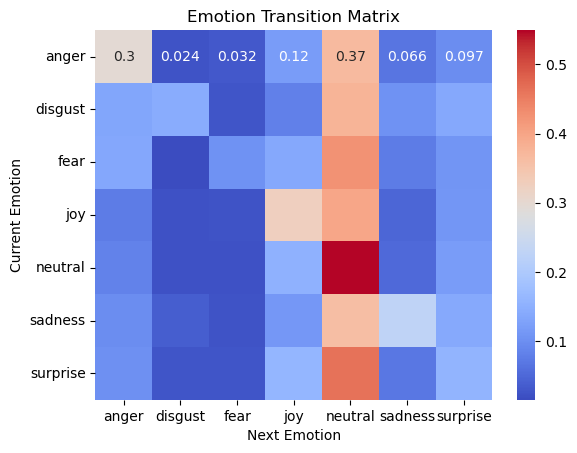

In [37]:
# Create a transition matrix
df['Next_Emotion'] = df['Emotion'].shift(-1)  # Emotion in the next utterance
transition_matrix = pd.crosstab(df['Emotion'], df['Next_Emotion'], normalize='index')

# Display heatmap
import seaborn as sns
sns.heatmap(transition_matrix, annot=True, cmap="coolwarm")
plt.title("Emotion Transition Matrix")
plt.xlabel("Next Emotion")
plt.ylabel("Current Emotion")
plt.show()

## Emotion Overlap
Objective: Explore overlapping patterns in word usage across emotions.
Approach:
Use word embeddings to calculate similarity between words used in different emotions.
Alternatively, visualize overlapping terms using Venn diagrams.

In [38]:
from matplotlib_venn import venn2

# Example: Overlap between "joy" and "surprise"
joy_words = set(" ".join(df[df['Emotion'] == 'joy']['Utterance']).split())
surprise_words = set(" ".join(df[df['Emotion'] == 'surprise']['Utterance']).split())

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn2([joy_words, surprise_words], ('Joy', 'Surprise'))
plt.title("Word Overlap Between Joy and Surprise")
plt.show()


ModuleNotFoundError: No module named 'matplotlib_venn'

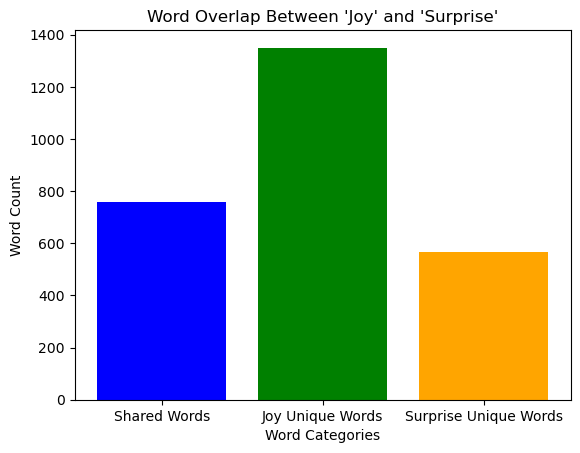

In [39]:
# Tokenize sentences into words
df["Words"] = df["Utterance"].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.split()

# Create word sets for two emotions
joy_words = set(word for words in df[df["Emotion"] == "joy"]["Words"] for word in words)
surprise_words = set(word for words in df[df["Emotion"] == "surprise"]["Words"] for word in words)

# Compute overlap and unique words
shared_words = joy_words & surprise_words
joy_unique = joy_words - shared_words
surprise_unique = surprise_words - shared_words

# Count and prepare for visualization
categories = ["Shared Words", "Joy Unique Words", "Surprise Unique Words"]
counts = [len(shared_words), len(joy_unique), len(surprise_unique)]

# Bar chart visualization
plt.bar(categories, counts, color=["blue", "green", "orange"])
plt.title("Word Overlap Between 'Joy' and 'Surprise'")
plt.ylabel("Word Count")
plt.xlabel("Word Categories")
plt.show()


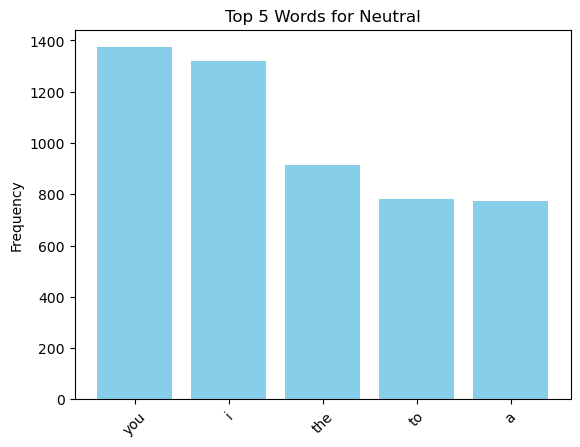

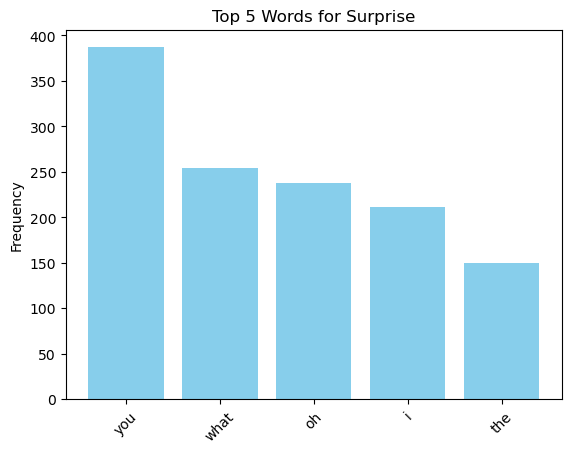

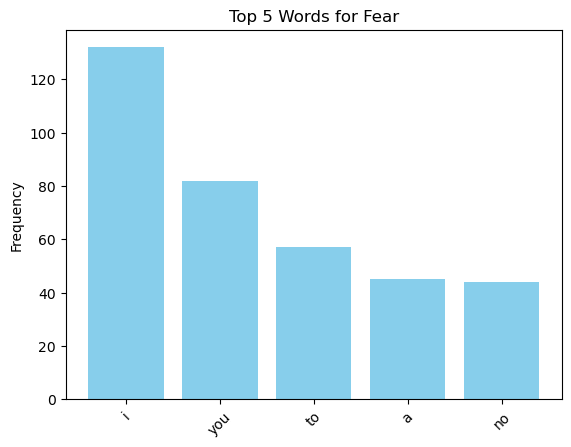

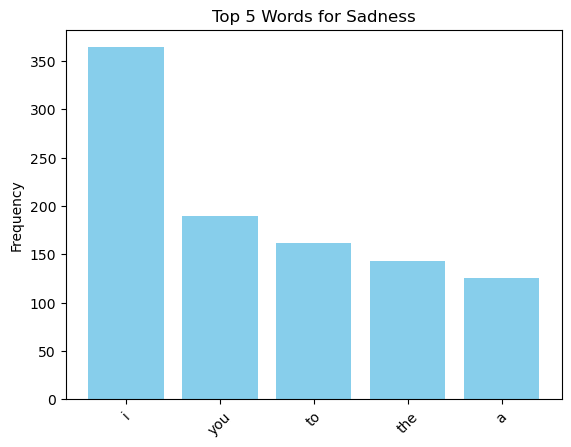

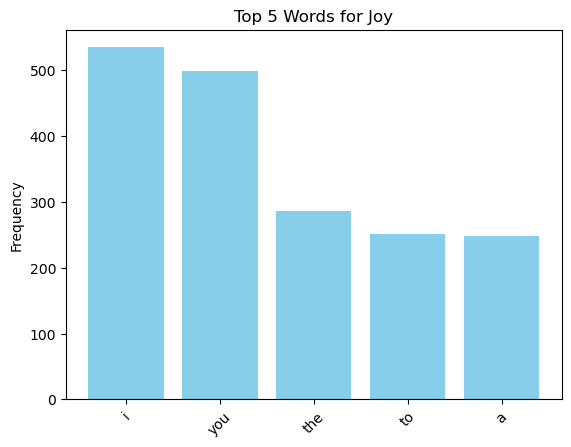

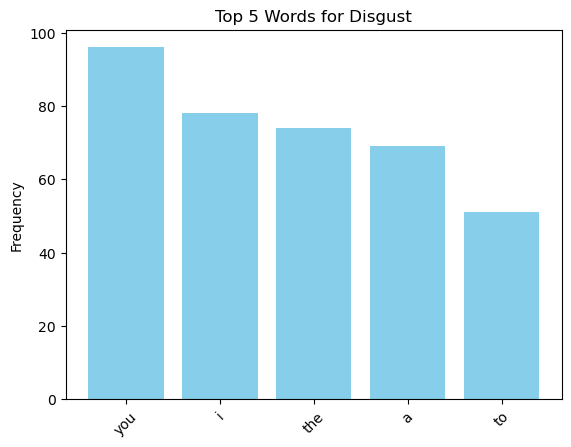

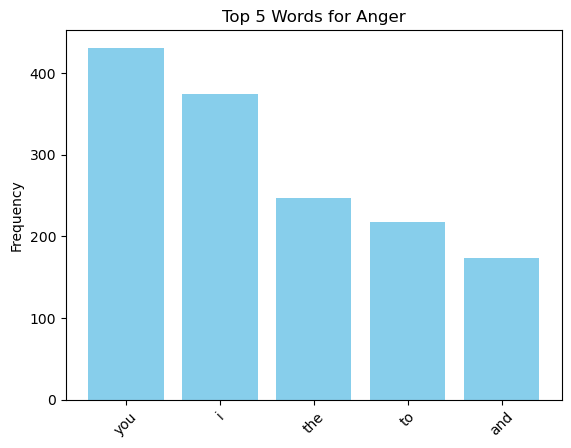

In [40]:
# Tokenize and clean sentences


# Collect word frequencies for each emotion
emotion_word_freq = {}
for emotion in df["Emotion"].unique():
    words = [word for words in df[df["Emotion"] == emotion]["Words"] for word in words]
    emotion_word_freq[emotion] = Counter(words)

# Generate Word Clouds and Bar Charts for Each Emotion
for emotion, freq in emotion_word_freq.items():
    # Generate Word Cloud
    # wordcloud = WordCloud(background_color="white", colormap="viridis").generate_from_frequencies(freq)
    
    # # Display Word Cloud
    # plt.figure(figsize=(6, 4))
    # plt.imshow(wordcloud, interpolation="bilinear")
    # plt.title(f"Word Cloud for {emotion.capitalize()}")
    # plt.axis("off")
    # plt.show()

    # Display Top Words in Bar Chart
    top_words = freq.most_common(5)
    words, counts = zip(*top_words)
    
    plt.bar(words, counts, color="skyblue")
    plt.title(f"Top 5 Words for {emotion.capitalize()}")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

In [42]:
# from transformers import BertTokenizer, BertModel
# import torch

# # Load pre-trained BERT model and tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# def get_bert_embedding(text):
#     inputs = tokenizer(text, return_tensors='pt')
#     outputs = model(**inputs)
#     # Get the embeddings from the last hidden state
#     embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling
#     return embeddings.detach().numpy()


# df['bert_embedding'] = df['Utterance'].apply(get_bert_embedding)


## Time Series Analysis

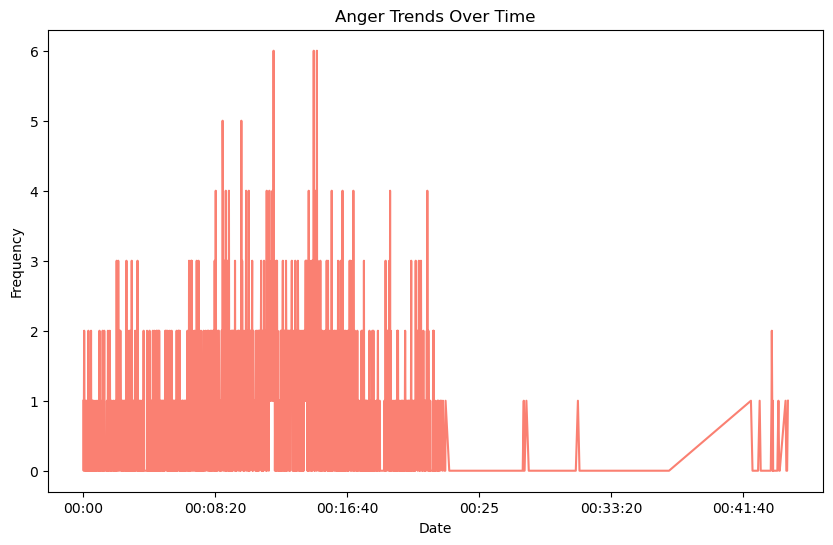

In [45]:
# Assuming 'Timestamp' column and 'Emotion' column exist
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

# Grouping by time periods
emotion_trends = df.groupby([df['StartTime'].dt.time, 'Emotion']).size().unstack(fill_value=0)

# Plot emotion trends
emotion_trends['anger'].plot(figsize=(10, 6), title="Anger Trends Over Time",c='salmon')
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.show()


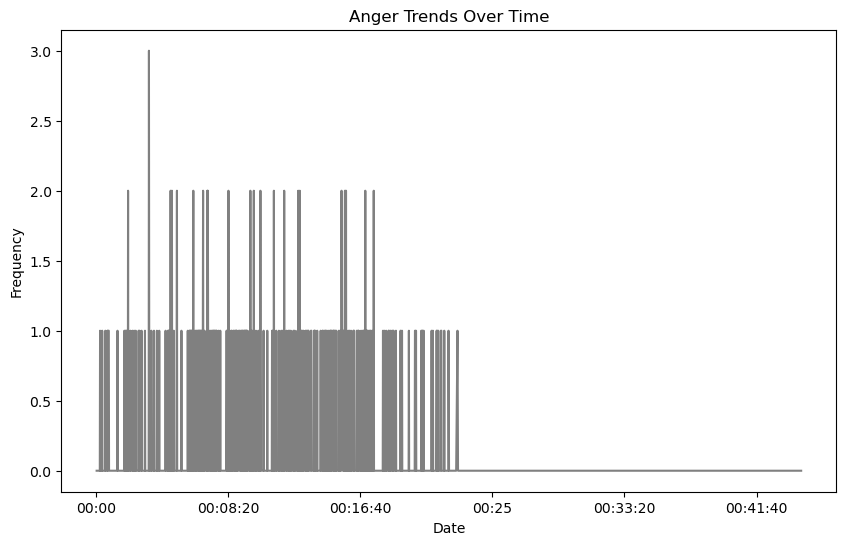

In [46]:
emotion_trends['disgust'].plot(figsize=(10, 6), title="Anger Trends Over Time",c='grey')
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.show()


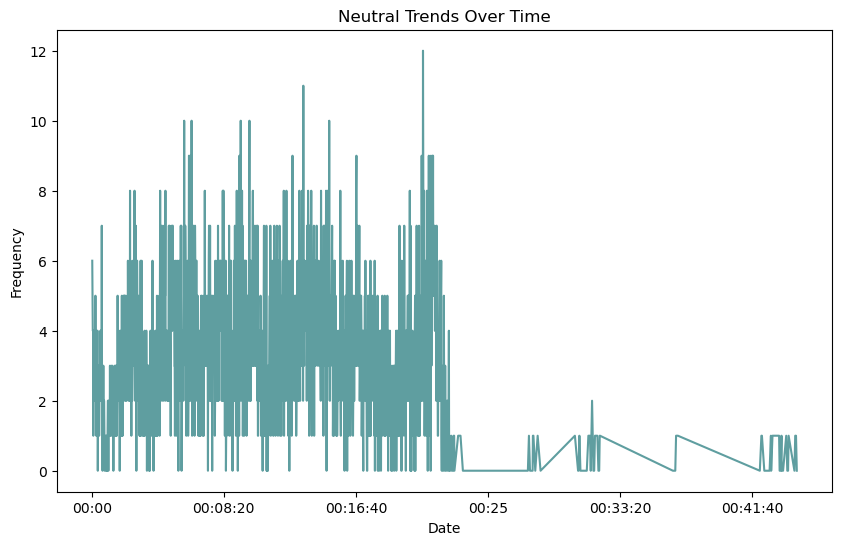

In [47]:
emotion_trends['neutral'].plot(figsize=(10, 6), title="Neutral Trends Over Time",c='cadetblue')
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.show()


In [50]:
# Polarity and Sentiment
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# analyzer = SentimentIntensityAnalyzer()

# # Apply sentiment analysis
# df['Sentiment'] = df['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# # Group by emotion
# emotion_sentiment = df.groupby('Emotion')['Sentiment'].mean()

# # Plot sentiment scores
# emotion_sentiment.plot(kind='bar', title='Average Sentiment by Emotion')
# plt.ylabel('Average Sentiment')
# plt.show()
# Compute sentiment polarity for sentences
# df['Sentiment'] = df['Utterance'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# # Group by dialogue or order
# dialogue_sentiment = df.groupby('DialogueID')['Sentiment'].apply(list)

# # Plot sentiment shifts for a single dialogue
# plt.plot(dialogue_sentiment.iloc[0])
# plt.title("Sentiment Shift in Dialogue")
# plt.xlabel("Utterance Order")
# plt.ylabel("Sentiment Polarity")
# plt.show()


In [54]:
#Contrastive Word Analysis
emotion_1 = 'sadness'
emotion_2 = 'anger'

# Compute average TF-IDF scores for each emotion
emotion_tfidf = tfidf_df.groupby('Emotion').mean()

# Compare word scores
word_diff = emotion_tfidf.loc[emotion_1] - emotion_tfidf.loc[emotion_2]
top_words = word_diff.sort_values(ascending=False).head(10)

# Display top distinguishing words
print(f"Top words distinguishing {emotion_1} from {emotion_2}:")
print(top_words)


Top words distinguishing sadness from anger:
sorry    0.064880
oh       0.016752
so       0.013534
uh       0.009128
just     0.008290
to       0.007214
we       0.006978
have     0.006535
was      0.006340
hard     0.006176
dtype: float64
